Regression is used to find real values<br>
It gives a general formula for the dataset<br>
In this we calculate how much the difference in between the predicted value and the actual value for the whole dataset<br>
Difference between actual value and predicted value is called cost function<br>
Error is calculated for entire dataset using this cost function

In [1]:
import matplotlib.pyplot as plt
# Importing Libraries

To read CSV file

In [2]:
import pandas as pd
# For importing algorithm
from sklearn.linear_model import LinearRegression
# For splitting between training and testing
from sklearn.model_selection import train_test_split
# Importing accuracy score and mean_squared_error
from sklearn.metrics import mean_squared_error, accuracy_score,mean_absolute_error
# For plotting
import matplotlib.pyplot as plt
# For dimension reduction
from sklearn.decomposition import PCA

Implementing Simple Linear Regression for salary dataset<br>
This dataset contains the years of experience and Salary of employees<br>
First column dosen't have any significance in data (Only used for Index)<br>
We can remove that<br>
To remove that we have two options

Method 1-By giving usecols arguments and only using required columns

In [3]:
data=pd.read_csv("Salary_dataset.csv",usecols=['YearsExperience','Salary'])
print(data)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


Method 2-By using the index_col and setting it to 0 so that it doesn't take index

In [4]:
data=pd.read_csv("Salary_dataset.csv",index_col=0)
print(data)

    YearsExperience    Salary
0               1.2   39344.0
1               1.4   46206.0
2               1.6   37732.0
3               2.1   43526.0
4               2.3   39892.0
5               3.0   56643.0
6               3.1   60151.0
7               3.3   54446.0
8               3.3   64446.0
9               3.8   57190.0
10              4.0   63219.0
11              4.1   55795.0
12              4.1   56958.0
13              4.2   57082.0
14              4.6   61112.0
15              5.0   67939.0
16              5.2   66030.0
17              5.4   83089.0
18              6.0   81364.0
19              6.1   93941.0
20              6.9   91739.0
21              7.2   98274.0
22              8.0  101303.0
23              8.3  113813.0
24              8.8  109432.0
25              9.1  105583.0
26              9.6  116970.0
27              9.7  112636.0
28             10.4  122392.0
29             10.6  121873.0


Preprocessing<br>
Splitting between Input and Output

In [5]:
X,Y=data['YearsExperience'].to_numpy().reshape(-1,1),data['Salary'].to_numpy().reshape(-1,1)
print("Input is:\n",X)
print("\nOutput is:\n",Y)
print("Shape of Input data is:",X,"Shape of Output data is:",Y)

Input is:
 [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]]

Output is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]
 [105583.]
 [116970.]
 [112636.]
 [122392.]
 [121873.]]
Shape of Input data is: [[ 1.2]
 [ 1.4]
 [ 1.6]
 [ 2.1]
 [ 2.3]
 [ 3. ]
 [ 3.1]
 [ 3.3]
 [ 3.3]
 [ 3.8]
 [ 4. ]
 [ 4.1]
 [ 4.1]
 [ 4.2]
 [ 4.6]
 [ 5. ]
 [ 5.2]
 [ 5.4]
 [ 6. ]
 [ 6.1]
 [ 6.9]
 [ 7.2]
 [ 8. ]
 [ 8.3]
 [ 8.8]
 [ 9.1]
 [ 9.6]
 [ 9.7]
 [10.4]
 [10.6]] Shape of Output data is: [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 6

Splitting into training and testing data<br>
we can do this directly as dataset is small instead of using train test split

In [6]:
x_train=X[:-5]
x_test=X[-5:]
y_train=Y[:-5]
y_test=Y[-5:]
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
 [[1.2]
 [1.4]
 [1.6]
 [2.1]
 [2.3]
 [3. ]
 [3.1]
 [3.3]
 [3.3]
 [3.8]
 [4. ]
 [4.1]
 [4.1]
 [4.2]
 [4.6]
 [5. ]
 [5.2]
 [5.4]
 [6. ]
 [6.1]
 [6.9]
 [7.2]
 [8. ]
 [8.3]
 [8.8]]

Testing data is:
 [[ 39344.]
 [ 46206.]
 [ 37732.]
 [ 43526.]
 [ 39892.]
 [ 56643.]
 [ 60151.]
 [ 54446.]
 [ 64446.]
 [ 57190.]
 [ 63219.]
 [ 55795.]
 [ 56958.]
 [ 57082.]
 [ 61112.]
 [ 67939.]
 [ 66030.]
 [ 83089.]
 [ 81364.]
 [ 93941.]
 [ 91739.]
 [ 98274.]
 [101303.]
 [113813.]
 [109432.]]
Shape of Training data is: (25, 1) Shape of Testing data is: (25, 1)


Choosing algorithm

In [7]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating model

In [8]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)
# Checking predicted value for given value
print("Predicted value for 1.5 is:\n",reg.predict([[1.5]]))

Training Accuracy score is: 92.98889340527403
Predicted values are:

[[113773.84320812]
 [118768.07936621]
 [119766.92659783]
 [126758.85721916]
 [128756.55168239]]
Predicted value for 1.5 is:
 [[37861.45360513]]


print(accuracy_score(predict,y_test))-Doesn't work as accuracy score doesn't take array

Checking for Error

In [9]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))

Mean Squared error is: 37525168.34948919
Mean Absolute error is: 5674.051614740992


Plotting<br>
We can see the points are much away from the line<br>
Cost function is very high<br>
This is why absolute and mean squared error is so high

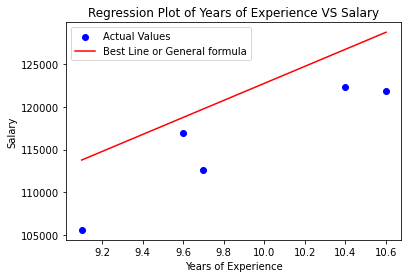

In [10]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predict,color="red")
plt.title("Regression Plot of Years of Experience VS Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend(['Actual Values','Best Line or General formula'])
plt.show()

Implementing Simple Linear Regression for housing dataset<br>
Trying for USA housing dataset<br>
area population(input) and price(output)

Since we need only two columns we will only import this two

In [11]:
df=pd.read_csv("USA_Housing.csv",usecols=['Area Population','Price'])
print("Dataset is:\n",df)
print("\nColumns are:\n",df.columns)
# Seeing dimension of column before reshaping
print("Dimension of Area Population column before reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column before reshaping to array is:",df['Price'].shape)

Dataset is:
       Area Population         Price
0        23086.800503  1.059034e+06
1        40173.072174  1.505891e+06
2        36882.159400  1.058988e+06
3        34310.242831  1.260617e+06
4        26354.109472  6.309435e+05
...               ...           ...
4995     22837.361035  1.060194e+06
4996     25616.115489  1.482618e+06
4997     33266.145490  1.030730e+06
4998     42625.620156  1.198657e+06
4999     46501.283803  1.298950e+06

[5000 rows x 2 columns]

Columns are:
 Index(['Area Population', 'Price'], dtype='object')
Dimension of Area Population column before reshaping to array is: (5000,)
Dimension of Price column before reshaping to array is: (5000,)


Preprocessing<br>
Splitting between Input and Output<br>
Columns are in dataframe ,thus they are in series format so we need to convert them to array and then also reshape them so that algorithm can use them

In [12]:
X,Y=df['Area Population'].to_numpy().reshape(-1,1),df['Price'].to_numpy().reshape(-1,1)
print("Input is:\n",X)
print("\nOutput is:\n",Y)
# Seeing dimension of column after reshaping
print("Shape of Input data(Area Population) is:",X.shape,"Shape of Output data(Price) is:",Y.shape)

Input is:
 [[23086.80050269]
 [40173.07217364]
 [36882.1593997 ]
 ...
 [33266.14548965]
 [42625.62015585]
 [46501.28380314]]

Output is:
 [[1059033.55787012]
 [1505890.91484695]
 [1058987.98787608]
 ...
 [1030729.58315229]
 [1198656.87240769]
 [1298950.48026696]]
Shape of Input data(Area Population) is: (5000, 1) Shape of Output data(Price) is: (5000, 1)


Splitting into training and testing data using train test split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
 [[46462.31347828]
 [38725.42430316]
 [19332.41977602]
 ...
 [17981.45046533]
 [35008.26751377]
 [19481.38512536]]

Testing data is:
 [[1510883.77735139]
 [ 696014.46771489]
 [1267150.83668714]
 ...
 [ 699222.83614379]
 [1368134.99768214]
 [1075550.21547577]]
Shape of Training data is: (4000, 1) Shape of Testing data is: (4000, 1)


Choosing algorithm

In [14]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating model<br>
Since the dataset is very big and we are only using one column accuracy is less

In [15]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)
# Checking predicted value for given value
print("Predicted value for 1.5 is:\n",reg.predict([[1.5]]))

Training Accuracy score is: 15.990908211624344
Predicted values are:

[[1293610.82374211]
 [1207803.39154316]
 [1225123.8600657 ]
 [1216517.96277612]
 [1021641.67337924]
 [1189088.56065548]
 [1057049.59032821]
 [1193092.9960161 ]
 [1294970.97614272]
 [1236594.70103799]
 [1258731.53614207]
 [1214908.72587491]
 [1486151.25632455]
 [1192460.7515734 ]
 [1233738.53802919]
 [1361888.93505293]
 [1108353.92896693]
 [1184785.22296736]
 [1382044.31822395]
 [1021135.58399278]
 [1193133.56420526]
 [1442052.76031093]
 [1079216.70790219]
 [1358791.51265357]
 [1048388.93907745]
 [1307433.07654886]
 [1405614.88233272]
 [1106710.31024429]
 [1112760.47210712]
 [1299923.1473889 ]
 [1380167.16791927]
 [1419601.79367626]
 [1048858.66759709]
 [1346438.29416906]
 [1354519.93734749]
 [1417788.19837074]
 [1100092.64953032]
 [1386759.3209248 ]
 [1291900.02794427]
 [1376401.94546229]
 [1447332.55747717]
 [ 878780.52610903]
 [1348616.71703458]
 [1195412.36295123]
 [1449446.56150268]
 [1096861.34802392]
 [1178905.

print(accuracy_score(predict,y_test))-Doesn't work as accuracy score dosen't take array

Checking for Error<br>
Error is more as accuracy is less

In [16]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))

Mean Squared error is: 101526077079.22557
Mean Absolute error is: 254552.980356407


Plotting<br>
We can see the points are much away from the line<br>
Cost function is very high<br>
This is why absolute and mean squared error is so high

Text(0, 0.5, 'Price')

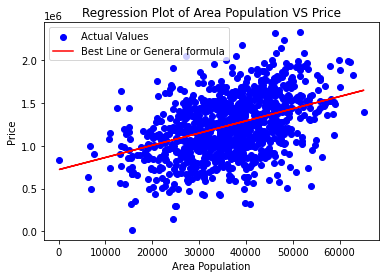

In [17]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_test,predict,color="red")
plt.legend(['Actual Values','Best Line or General formula'])
plt.title("Regression Plot of Area Population VS Price")
plt.xlabel("Area Population")
plt.ylabel("Price")
# plt.show()

Implementing Multiple Linear Regression for housing dataset<br>
Trying for USA housing dataset<br>
area population and all parameters(input) and price(output)

In [18]:
df=pd.read_csv("USA_Housing.csv")
print("Dataset is:\n",df)
print("\nColumns are:\n",df.columns)
# This column is not useful so we drop it
df=df.drop('Address',axis=1)
# Seeing dimension of column before reshaping
print("Dimension of Area Population column before reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column before reshaping to array is:",df['Price'].shape)

Dataset is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                            

Columns are in dataframe ,thus they are in series format so we need to convert them to array and then also reshape them so that algorithm can use them<br>
Function to reshape columns

In [19]:
func = lambda i:df[i].to_numpy().reshape(-1,1)
for i in df.columns:
    df[i]=func(i)
print("Dataset after reshaping is:\n",df)

Dataset after reshaping is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0             

Seeing dimension of column after reshaping

In [20]:
print("Dimension of Area Population column after reshaping to array is:",df['Area Population'].shape)
print("Dimension of Price column after reshaping to array is:",df['Price'].shape)

Dimension of Area Population column after reshaping to array is: (5000,)
Dimension of Price column after reshaping to array is: (5000,)


Preprocessing<br>
Splitting between Input and Output

In [21]:
X,Y=df.drop('Price',axis=1),df['Price']
print("Input is:\n",X)
print("\nOutput is:\n",Y)
print("\nShape of Input data is:",X.shape,"Shape of Output data is:",Y.shape)

Input is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population  
0                             4.09     23086.8

Splitting into training and testing data using train test split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)
print("Training data is:\n",x_train)
print("\nTesting data is:\n",y_train)
print("Shape of Training data is:",x_train.shape,"Shape of Testing data is:",y_train.shape)

Training data is:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4152      74264.417479             5.556855                   7.143696   
1323      80233.228301             5.334072                   7.034766   
1098      72469.541778             5.606395                   8.044576   
4076      66039.622184             4.568032                   5.243971   
436       75070.262571             6.680451                   6.261276   
...                ...                  ...                        ...   
2750      44218.541110             5.589396                   9.449250   
2197      68057.065802             6.748409                   7.883019   
1067      41533.012960             6.853578                   5.055629   
4989      47965.406896             5.694638                   7.363327   
3674      77449.316068             5.034661                   6.760959   

      Avg. Area Number of Bedrooms  Area Population  
4152                          3.31    

Choosing algorithm

In [23]:
reg=LinearRegression()
# Training data
reg.fit(x_train,y_train)

LinearRegression()

Evaluating model<br>
Since the dataset is very big and we are using all columns accuracy increases

In [24]:
print("Training Accuracy score is:",reg.score(x_train,y_train)*100)
# Checking predicted values
predict=reg.predict(x_test)
print("Predicted values are:\n")
print(predict)

Training Accuracy score is: 91.78285261348096
Predicted values are:

[1213054.44103987 1215273.13287561 1076829.13696745 1359938.26565803
 1285833.59849402 1119630.98969266 1526426.42845774 1105440.59854579
 1661399.51379782 1729158.26912196 1074865.00251733  993331.08870526
 1627893.47099729  850072.72858009 1028684.30726434  823618.45476796
  879846.83197769 1351604.85412508 1242224.22193302 1209779.48523967
  791752.53291467 1767300.90942338  884883.99464402 1300127.34514708
  675612.40185441 1671997.45260931 1411822.79458784 1296773.64412425
 1154166.68913021 1653767.30630497 1106098.71343305  888059.06811775
 1330731.19327721 1399190.16242318  999543.27550096 1454874.74840434
 1436686.02211771 1306673.73749843 1632737.41694966  915493.76871232
  984464.02857948 1303358.75190016 1263050.41530748 1412265.68278714
 1276645.49766296  889163.37074684 1308939.11569748 1582510.20847508
  844406.5262884  1462396.09393811  989029.82807772 1180793.09250321
 1266147.44444483 1186934.39828485

Checking for Error<br>
Error is less as accuracy is more

In [25]:
print("Mean Squared error is:",mean_squared_error(y_test,predict))
print("Mean Absolute error is:",mean_absolute_error(y_test,predict))

Mean Squared error is: 10516537448.56889
Mean Absolute error is: 82805.16769014584


Plotting graph for complete dataset

PCA (Principle component analysis)- For Dimension reduction of data<br>
As we cannot plot with multiple dimensions thus dimensions will be reduced to 2

In [26]:
x=PCA(n_components=2)
# Transforming data
pca_data=x.fit_transform(X)
print("Transforming data\n",x.fit_transform(X))
print("\nShape of Transformed data is:\n",pca_data.shape)
print("\nTransformed Data is:\n",pca_data)

Transforming data
 [[-12355.34231389  11769.41434607]
 [-10150.51349937  -5176.60316217]
 [  7330.64748761    101.39871032]
 ...
 [  4836.0192449    3459.61287124]
 [  1300.45425077  -6356.57719758]
 [  4208.80933424  -9929.54125856]]

Shape of Transformed data is:
 (5000, 2)

Transformed Data is:
 [[-12355.34231389  11769.41434607]
 [-10150.51349937  -5176.60316217]
 [  7330.64748761    101.39871032]
 ...
 [  4836.0192449    3459.61287124]
 [  1300.45425077  -6356.57719758]
 [  4208.80933424  -9929.54125856]]


Transforming testing dataset

In [27]:
x=PCA(n_components=2)
pca_data_2 = x.fit_transform(x_test)
print("Transforming data\n",x.fit_transform(x_test))
print("\nShape of Transformed data is:\n",pca_data_2.shape)
print("\nTransformed Data is:\n",pca_data_2)

Transforming data
 [[ 1771.81565453  5495.59774127]
 [-9492.20122142 -6862.58130411]
 [ 9055.82212995  2662.43902172]
 ...
 [ 9012.83961128  8681.6642555 ]
 [-4893.35500957 -1934.49225898]
 [-1427.45082022  2638.9649737 ]]

Shape of Transformed data is:
 (1000, 2)

Transformed Data is:
 [[ 1771.81565453  5495.59774127]
 [-9492.20122142 -6862.58130411]
 [ 9055.82212995  2662.43902172]
 ...
 [ 9012.83961128  8681.6642555 ]
 [-4893.35500957 -1934.49225898]
 [-1427.45082022  2638.9649737 ]]


Plotting<br>
We can see the points are closer to line<br>
Cost function is very low<br>
This is why absolute and mean squared error is low<br>
Since we have multiple Independent Variable, the graph contains multiple regression lines

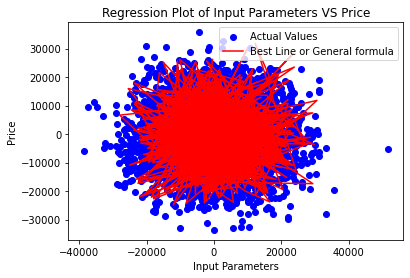

In [28]:
plt.scatter(pca_data[:,0],pca_data[:,1],color="blue")
plt.plot(pca_data_2[:,0],pca_data_2[:,1],color="red")
plt.legend(['Actual Values','Best Line or General formula'])
plt.title("Regression Plot of Input Parameters VS Price")
plt.xlabel("Input Parameters")
plt.ylabel("Price")
plt.show()